In [587]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

# Question 1 

Function (“tfidf_vectorizer”) receive a corpus (list of strings) and the minimal word
frequency (words that would occur fewer than this number of times in the corpus will be
ignored). FIRST function do not use sklearn algorithms directly. A function returns:

a. Vocab – a dictionary with a mapping of words to ids.

b. Document Frequency: a vector of size len(vocab) containing the number of
documents holding the corresponding word. Element i of the vector would contain
the number of documents with the word with id i.

c. Word frequency: a vector containing the number of times each word is found in the
corpus.

d. Matrix of shape len(documents) x len(vocab) with TF-IDF values for every document
in the corpus.

Preparing Data:

In [599]:
def preparing_data(text):
    stop_words = set(pd.read_csv('https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/raw/stop-words-english1.txt', header=None)[0].tolist())
    stop_words_specific = ["rt"]
    list_of_words = []
    list_of_tweets = []
    text = text.lower()
    words = text.split()
    tweets = text.split("rt @")
    for tweet in tweets:
        tweet = ''.join([item for item in tweet if item not in "!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"])
        list_of_tweets.append(tweet)
    for char in words:
        word = ''.join([item for item in char if item not in "!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~"])
        list_of_words.append(word)
    text = " ".join(list_of_words)
    text_tokens = [token for token in list_of_words if token not in stop_words ] # drop stop words
    text_tokens = [token for token in text_tokens if not token.isnumeric() and len(token)>1] # remove words with number
    text_tokens = [token for token in text_tokens if token not in stop_words_specific ]
    return text_tokens, list_of_tweets

### Vocab – a dictionary with a mapping of words to ids.

In [589]:
def create_dictionary(text_tokens):
    counts = Counter(text_tokens)
    dictionary = {}
    for word in counts:
        myDict = {key:val for key, val in counts.items() if val >= min_num_frequency}
    for word,i in enumerate(myDict):
            dictionary[word]=i
    return dictionary

In [590]:
def create_inverse_dictionary(dictionary):
    inverse_dictionary = {}
    for index in dictionary:
        word = dictionary[index]
        index_of_word = index
        inverse_dictionary[word] = index_of_word
    return inverse_dictionary

### Word frequency: a vector containing the number of times each word is found in the corpus.

In [591]:
def tf(text_tokens,inverse_dictionary):
    from collections import Counter
    counts = Counter(text_tokens)
    tf_list = []
    for token in inverse_dictionary:
        for word in counts:
            if token == word:
                tf_list.append(counts[word])
    tf_array = np.array(tf_list)
    return tf_array

### Document Frequency: a vector of size len(vocab) containing the number of
### documents holding the corresponding word. Element i of the vector would contain
### the number of documents with the word with id i.

In [592]:
def df(list_of_tweets,dictionary):
    count_words_in_document = np.zeros(len(dictionary))
    for index in dictionary: 
        for tweet in list_of_tweets:
            tweet_text = set(tweet.split())
            for token in tweet_text:
                if dictionary[index] == token:
                    count_words_in_document[index]+=1
    return count_words_in_document.astype(int)

## d. Matrix of shape len(documents) x len(vocab) with TF-IDF values for every document
## in the corpus. 

In [593]:
def tf_matrix_calculation(list_of_tweets,dictionary):
    matrix = []
    for tweet in list_of_tweets:
        tweet_text = tweet.split()
        tf_tweet = np.zeros(len(dictionary))
        for index in dictionary:
            for token in tweet_text:
                if dictionary[index] == token:
                    tf_tweet[index]+=1
        matrix.append(tf_tweet)
    return matrix

In [594]:
def tfidf_vectorizer(text, min_number):
    text_tokens,list_of_tweets = preparing_data(text)
    dictionary = create_dictionary((text_tokens))
    inverse_dictionary = create_inverse_dictionary(dictionary)
    tf_array = tf(text_tokens,inverse_dictionary)
    df_array = df(list_of_tweets,dictionary)
    tf_matrix = tf_matrix_calculation(list_of_tweets,dictionary)
    tf1 = np.array(tf_matrix)
    tf_idf = tf1*np.log10(len(list_of_tweets)/df_array)
    tf_idf = np.asmatrix(tf_idf)
    return tf_idf,dictionary,tf_array,df_array,list_of_tweets

### PUT YOUR TEXT TO 'TEXT' and ENTER THE NUMBER OF THE MINIMAL WORD FREQUENCY

In [596]:
path= r"C:\Users\Leon\Machine Learning\tweets.txt"
with open(path,"r",encoding='utf8') as in_file:
        text = in_file.read()
min_num_frequency = int(input('Minimal word frequency:'))
tf_idf_matrix,dictionary,tf_array,df_array,list_of_tweets = tfidf_vectorizer(text,min_num_frequency)
print(f' Dictionary: {dictionary} \n')
print(f' tf_array: {tf_array} \n')
print(f'df_array: {df_array} \n')
print(f' Matrix of tf-idf: {tf_idf_matrix}')

Minimal word frequency:1000
 Dictionary: {0: 'ukip', 1: 'david', 2: 'cameron', 3: 'bbcqt', 4: 'asknigelfarage', 5: 'ed', 6: 'vote', 7: 'tories', 8: 'miliband', 9: 'snp', 10: 'http…', 11: 'labour', 12: 'deal', 13: 'tory', 14: 'work', 15: 'amp', 16: 'farage'} 

 tf_array: [3506 1690 2433 2706 1174 2739 1395 4185 5267 5177 1328 2772 1168 1675
 1037 1058 1907] 

df_array: [2791 1582 2217 2622 1140 2501 1160 3881 4800 3926 1328 2426 1100 1558
 1024  958 1725] 

 Matrix of tf-idf: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.67910289 0.         0.         ... 0.         0.         0.        ]
 [0.         0.92565625 0.77909704 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.77614726]
 [0.         0.         0.         ... 0.         0.         0.        ]]


#  Question 2 

Created Small search engine, a function called “search” to search for tweets based on
query. The function would receive the data you’ve generated in ‘tfidf_vectorizer’, a list of
tweets to search through, a search query (string) and the number of matches to return.
The function will preprocess the query (same pre-processing as the one you used to
compute tf-idf), convert the query into a vector and find the requested number of the most
similar tweets.
The function will return: a list of tweets ranked by their similarity to the query and a list of
values representing fit of every result.
At the end you can see a few examples of its use. 

In [564]:
from sklearn.feature_extraction.text import CountVectorizer
vect_model = CountVectorizer(stop_words='english')
word_counts = vect_model.fit_transform(list_of_tweets)

In [565]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
tf_idf_pipeline = Pipeline([
    ('vect',CountVectorizer(stop_words='english')),
    ('tfidf',TfidfTransformer()), 
    ('norm',Normalizer(norm='l2')), 
    ])
tf_idf = tf_idf_pipeline.fit_transform(list_of_tweets)
vocab = np.array(tf_idf_pipeline.named_steps['vect'].get_feature_names_out())
word_counts = tf_idf_pipeline.named_steps['vect'].transform(list_of_tweets)

In [566]:
def search(data, model,tf_idf,search_query, top_n=15):
    from sklearn.metrics.pairwise import cosine_similarity
    phrases_matrix = model.transform([search_query]) # convert search string into a vector using trained model
    similarities = cosine_similarity(tf_idf,phrases_matrix[0]).flatten() # compute similarity of the search string to each book
    similarity_order =(-similarities).argsort().flatten()[:top_n] #  sort books by similarity to the term
    result = data.iloc[similarity_order].copy().reset_index()
    result['similarity'] = similarities[similarity_order]
    return result, search_query

In [567]:
data = pd.DataFrame(list_of_tweets)
result, search_query = search(data, tf_idf_pipeline, tf_idf,'ukip')
print('Search query: {}'.format(search_query))
result

Search query: ukip


,index,0,similarity
0,13280,supr3m3b3ing1 nigelfarage ukip ukip nigelfarag...,0.967465
1,11738,supr3m3b3ing1 nigelfarage ukip ukip nigelfarag...,0.967465
2,9262,blairmcdougall ed just called snp bluff now up...,0.956740
3,8768,ukip ukip leader nigelfarage on our nhs asknig...,0.820143
4,9350,ukip ukip leader nigelfarage on our nhs asknig...,0.409796
5,11804,ukip ukip leader nigelfarage on our nhs asknig...,0.409796
6,8198,ukip ukip leader nigelfarage on our nhs asknig...,0.409796
7,9108,ukip ukip leader nigelfarage on our nhs asknig...,0.409796
8,8391,ukip ukip leader nigelfarage on our nhs asknig...,0.409796
9,8220,ukip ukip leader nigelfarage on our nhs asknig...,0.409796


In [568]:
result, search_query = search(data, tf_idf_pipeline, tf_idf,'War')
print('Search query: {}'.format(search_query))
result

Search query: War


,index,0,similarity
0,3962,labourpress clear winner tonight was ed miliba...,0.428356
1,8819,nickcohen4 clegg says cold war is over just wh...,0.359378
2,1277,blacktriangle1 numpty ed miliband just declare...,0.311341
3,2091,oohincensed avitusparta cameron would have fou...,0.301756
4,826,katiekhaleesi im snpbecause in my entire adult...,0.287894
5,1682,katiekhaleesi im snpbecause in my entire adult...,0.287894
6,5655,katiekhaleesi im snpbecause in my entire adult...,0.287894
7,4143,katiekhaleesi im snpbecause in my entire adult...,0.287894
8,3935,nicolasturgeon if miliband is going to let tor...,0.275008
9,2552,nicolasturgeon if miliband is going to let tor...,0.264008


In [569]:
result, search_query = search(data, tf_idf_pipeline, tf_idf,'cameron')
print('Search query: {}'.format(search_query))
result

Search query: cameron


,index,0,similarity
0,3723,"bbcpolitics ""i thought that was the performanc...",0.303694
1,5102,pollycurtis guardianicm poll david cameron on ...,0.278110
2,11782,pollycurtis guardianicm poll david cameron on ...,0.278110
3,12741,pollycurtis guardianicm poll david cameron on ...,0.278110
4,11572,pollycurtis guardianicm poll david cameron on ...,0.278110
5,11073,pollycurtis guardianicm poll david cameron on ...,0.278110
6,12475,pollycurtis guardianicm poll david cameron on ...,0.278110
7,828,pollycurtis guardianicm poll david cameron on ...,0.278110
8,8017,pollycurtis guardianicm poll david cameron on ...,0.278110
9,12296,pollycurtis guardianicm poll david cameron on ...,0.278110


In [570]:
result, search_query = search(data, tf_idf_pipeline, tf_idf,'asknigelfarage')
print('Search query: {}'.format(search_query))
result

Search query: asknigelfarage


,index,0,similarity
0,4327,viscountexmouth go nigel ukip asknigelfarage\n,0.372664
1,11635,realdealdanny nigel farage is on fire 🔥🔥🔥🔥 ask...,0.356199
2,3843,dvatw so a likely 75 of asknigelfarage audienc...,0.340422
3,8818,jakepainter2 farage absolutely smashed it vote...,0.304576
4,8727,nigelfarage im proud of ukips health policy wh...,0.298291
5,6226,haveyoumetkiwi finally somebody called nigel f...,0.290330
6,8391,ukip ukip leader nigelfarage on our nhs asknig...,0.277698
7,11804,ukip ukip leader nigelfarage on our nhs asknig...,0.277698
8,8220,ukip ukip leader nigelfarage on our nhs asknig...,0.277698
9,9108,ukip ukip leader nigelfarage on our nhs asknig...,0.277698


# Question 3 

Compare performance of the function you have created in 1) to sklearn
implementation. Which one is faster and by how much? What are the memory requirements
for each? (i.e. how much RAM is consumed to store results for each of the approaches?). 

What are the memory requirements for each? 

In [571]:
import sys

The memory required for the first approach:

In [572]:
sys.getsizeof(tf_idf_matrix) 

152

The memory required for the sklearn approach:

In [573]:
sys.getsizeof(tf_idf)

48

In [574]:
import time
path= r"C:\Users\Leon\Machine Learning\tweets.txt"
with open(path,"r",encoding='utf8') as in_file:
        text = in_file.read()
min_num_frequency = int(input('Minimal word frequency:'))
start_time = time.perf_counter()
tf_idf_matrix,dictionary,tf_array,df_array,list_of_tweets = tfidf_vectorizer(text,min_num_frequency)
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")

Minimal word frequency:1
The execution time is: 1921.1443456999987


It's took 32 minutes!

In [575]:
start_time = time.perf_counter()
tf_idf = tf_idf_pipeline.fit_transform(list_of_tweets)
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")

The execution time is: 0.2891075999941677


The execution is 0.28 mil seconds.

# Question 4

The files ‘negative_tweets.txt’ and ‘positive_tweets.txt’ contain negative and positive
tweets correspondingly. Use WordCloud component (pip install wordcloud) to visualize the
difference between the two corpora. Make sure to clean the tweets before processing them.
Do results make sense? Use TF-IDF to support and expand your findings

In [576]:
!pip install wordcloud
!pip install python-pptx

     ------------------------------------ 153.1/153.1 kB 508.3 kB/s eta 0:00:00
     ---------------------------------------- 10.1/10.1 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached lxml-4.9.1-cp39-cp39-win_amd64.whl (3.6 MB)
     -------------------------------------- 150.0/150.0 kB 8.7 MB/s eta 0:00:00
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470993 sha256=0628a18872d6a176e46f0fa093b16b94ddc9aa25272b92ca0dd76291e872b36f
  Stored in directory: c:\users\leon\appdata\local\pip\cache\wheels\34\0d\ee\96665b7eae3168c070fc0654cddd2a443a9614dcf15ed585a1
Successfully built python-pptx


# POSITIVE

In [578]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [579]:
path= r"C:\Users\Leon\Machine Learning\positive_tweets.txt"
with open(path,"r",encoding='utf8') as in_file:
        positive_tweets = in_file.read()
positive_tokents, positive_list_of_tweets = preparing_data(positive_tweets)
tf_idf = tf_idf_pipeline.fit_transform(positive_list_of_tweets)
vocab = np.array(tf_idf_pipeline.named_steps['vect'].get_feature_names_out())
normalized_tf_idf = dict([(vocab[i],tf_idf[0,i]) for i in range(tf_idf.shape[1]) if tf_idf[0,i]>0])

In [580]:
sorted_normalized_tf_idf = sorted(normalized_tf_idf.items(), key=lambda x: -x[1])
sorted_normalized_tf_idf[:20]

[('follow', 0.3199665364250218),
 ('followfriday', 0.24685143445237331),
 ('community', 0.20040992787576276),
 ('week', 0.17866721015920592),
 ('httptcorcvcyyo0iq', 0.16830779621752726),
 ('jnlazts', 0.16830779621752726),
 ('lt3', 0.1649235786084978),
 ('love', 0.1631201950402072),
 ('amp', 0.14430813128243555),
 ('hi', 0.11920321945245911),
 ('like', 0.11292936579706653),
 ('thanks', 0.10665551214167394),
 ('today', 0.09410780483088878),
 ('good', 0.0878339511754962),
 ('engaged', 0.08655218972860564),
 ('thank', 0.0824617893042489),
 ('great', 0.0815600975201036),
 ('im', 0.0815600975201036),
 ('just', 0.0815600975201036),
 ('new', 0.0815600975201036)]

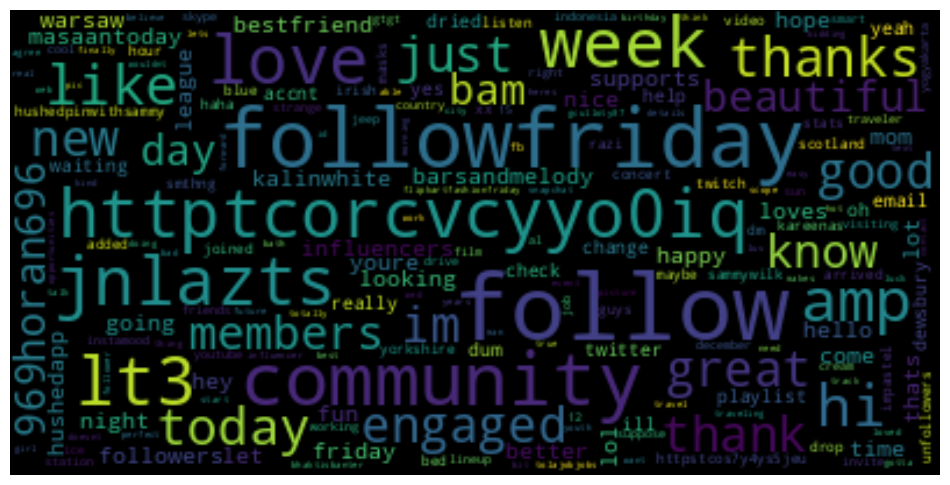

In [583]:
wordcloud = WordCloud(max_font_size=40)
wordcloud.generate_from_frequencies(normalized_tf_idf)
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Negative

In [584]:
path= r"C:\Users\Leon\Machine Learning\negative_tweets.txt"
with open(path,"r",encoding='utf8') as in_file:
        negative_tweets = in_file.read()
negative_tokents, negative_list_of_tweets = preparing_data(negative_tweets)
tf_idf = tf_idf_pipeline.fit_transform(negative_list_of_tweets)
vocab = np.array(tf_idf_pipeline.named_steps['vect'].get_feature_names_out())
normalized_tf_idf = dict([(vocab[i],tf_idf[0,i]) for i in range(tf_idf.shape[1]) if tf_idf[0,i]>0])

In [585]:
sorted_normalized_tf_idf = sorted(normalized_tf_idf.items(), key=lambda x: -x[1])
sorted_normalized_tf_idf[:20]

[('im', 0.36075333912459906),
 ('dont', 0.22246455912683608),
 ('miss', 0.17436411391022288),
 ('like', 0.1683515582581462),
 ('want', 0.1683515582581462),
 ('just', 0.1443013356498396),
 ('time', 0.13828877999776296),
 ('good', 0.11423855738945636),
 ('feel', 0.10822600173737972),
 ('got', 0.10822600173737972),
 ('sorry', 0.10822600173737972),
 ('sad', 0.0962008904332264),
 ('uniteblue', 0.0916212748524601),
 ('bad', 0.09018833478114976),
 ('ive', 0.09018833478114976),
 ('know', 0.09018833478114976),
 ('think', 0.09018833478114976),
 ('tcot', 0.08144113320218677),
 ('did', 0.07816322347699646),
 ('didnt', 0.07816322347699646)]

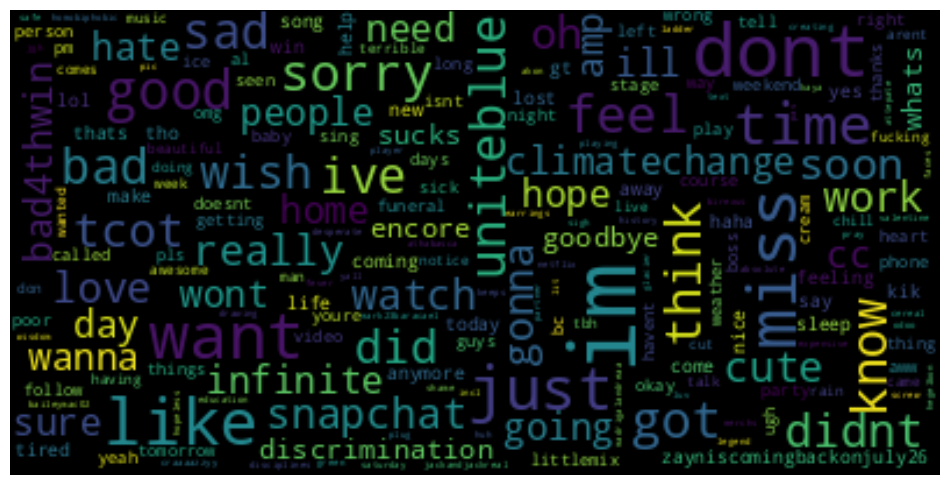

In [600]:
wordcloud = WordCloud(max_font_size=40)
wordcloud.generate_from_frequencies(normalized_tf_idf)
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Do results make sense? Yes, in both cases we can see negative an posite words. Word 'Good' appears in both cases, in my opnion, it's becouse in the second case word 'not' comes before 'good'. 